# Unsupervised Learning on Country Data

**About organization:**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.


**Problem Statement:**

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_score
from matplotlib.cm import get_cmap
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('Data/Country-data.csv')
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## Data Cleaning

In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
copied_df = df.copy()

In [6]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
copied_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# Select only the numeric columns
numeric_df = copied_df.select_dtypes(include=['float64', 'int64'])
numeric_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


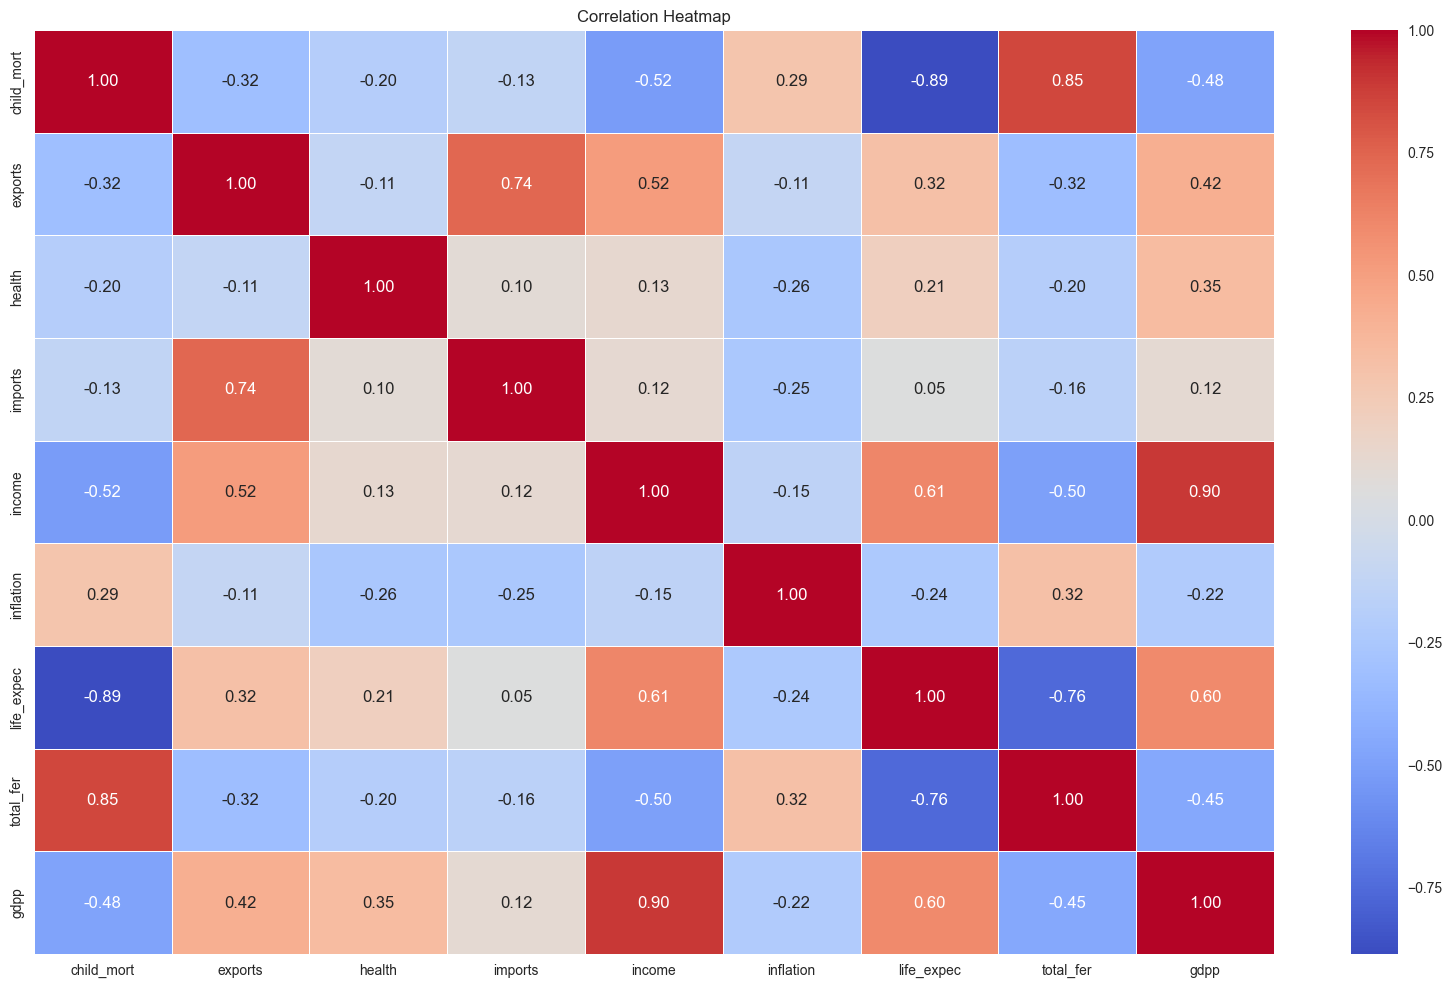

In [9]:

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap(Before).png",dpi = 300,bbox_inches ="tight")

plt.show();

In [10]:
copied_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
copied_df['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [12]:
copied_df['country'].nunique()

167

In [13]:
# Check if 'country' column has unique values
unique_country = copied_df['country'].is_unique

print(f"Are all values in 'country' column unique? {unique_country}")


Are all values in 'country' column unique? True


## Preprocessing

Convert category column into 1 and 0 using scikit-learn one hot encoding

In [14]:
object_columns = copied_df.select_dtypes(include='object')
object_columns


,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [15]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # `sparse=False` returns a dense array

# Fit and transform the "country" column
encoded_countries = encoder.fit_transform(copied_df[['country']])

# Create a DataFrame with the one-hot encoded columns
encoded_countries_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['country']))

encoded_countries_df



,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Drop the original "country" column from coppied_df
copied_df = copied_df.drop('country', axis=1)

# Concatenate the one-hot encoded columns with the original DataFrame
copied_df = pd.concat([copied_df, encoded_countries_df], axis=1)

# Display the DataFrame after applying one-hot encoding
copied_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling

In [17]:
numeric_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [18]:
#Scaling
scaler = StandardScaler()
scaler.fit(numeric_df)
scaled_df_use = pd.DataFrame(scaler.transform(numeric_df),columns= numeric_df.columns )
scaled_df_use.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [19]:
combined_df = pd.concat([scaled_df_use, encoded_countries_df], axis=1)
combined_df


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Principal component analysis (PCA)

In [20]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=10)
pca.fit(combined_df)
PCA_use = pd.DataFrame(pca.transform(combined_df), columns=(["PCA1","PCA2", "PCA3", "PCA4", "PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]))
PCA_use.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-2.915133,0.095806,-0.719953,1.008276,-0.159026,-0.257984,0.392979,0.428917,-0.014768,0.676958
1,0.430222,-0.589293,-0.334338,-1.164548,0.175467,0.085704,0.255404,-0.228413,0.180909,0.061562
2,-0.285431,-0.456055,1.224626,-0.870723,0.157182,-0.407039,-0.089486,-0.190303,0.087719,-0.092016
3,-2.934545,1.698835,1.528940,0.842148,-0.274444,-0.555286,-0.452320,-0.367868,-0.095341,0.010556
4,1.034324,0.136923,-0.226298,-0.849608,-0.193880,-0.209671,0.248282,-0.024471,0.098400,-0.063152


In [21]:
PCA_use.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,167.0,-3.776088e-16,2.041224,-4.915621,-1.383271,0.022423,1.225214,6.922761
PCA2,167.0,1.382793e-16,1.249674,-3.003162,-0.753503,-0.094681,0.554545,6.695016
PCA3,167.0,-9.307259e-18,1.087869,-2.721019,-0.523211,-0.246233,0.403574,6.125769
PCA4,167.0,-1.236536e-16,1.003395,-1.599993,-0.786140,-0.312794,0.712861,3.139048
PCA5,167.0,-3.191060e-17,0.818916,-2.855010,-0.388742,-0.056246,0.303274,5.366860
PCA6,167.0,-4.387708e-17,0.480575,-1.471335,-0.242651,-0.001349,0.217300,3.183531
PCA7,167.0,6.382120e-17,0.346621,-0.988886,-0.228932,-0.033615,0.185055,1.090822
PCA8,167.0,7.179885e-17,0.308012,-0.765515,-0.196062,-0.039446,0.165596,0.927572
PCA9,167.0,-1.728491e-17,0.270743,-1.042436,-0.132359,-0.007854,0.141473,1.205897
PCA10,167.0,3.822624e-18,0.077615,-0.390568,-0.027251,0.000839,0.025705,0.676958


### Clustering

#### Elbow Graph

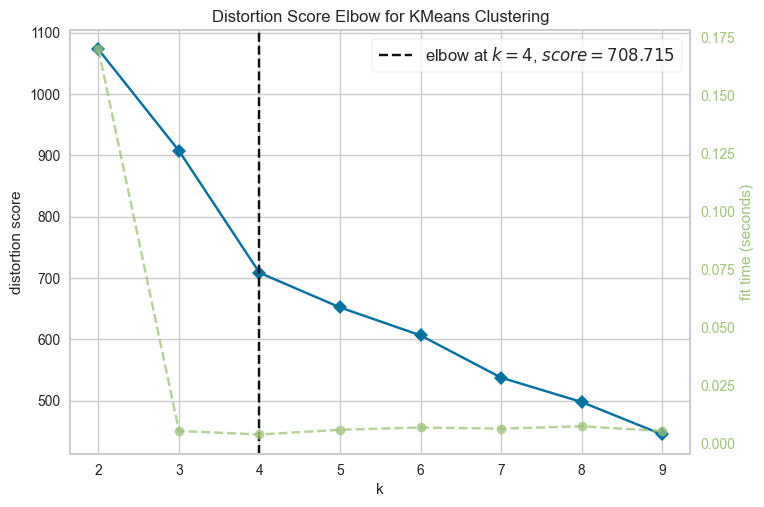

Optimal number of clusters: 4


In [22]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))  # Search for optimal k from 2 to 10
visualizer.fit(PCA_use)

#Save the image below
plt.savefig("Elbow Graph.png",dpi = 300,bbox_inches ="tight")

visualizer.show()

print("Optimal number of clusters:", visualizer.elbow_value_)

### Compare Original vs PCA Data

#### Kmeans Clustering

##### Perform K-means clustering on original data

In [23]:
model_original = KMeans(n_clusters = visualizer.elbow_value_, random_state = 42)
labels_original = model_original.fit_predict(combined_df)
labels_original 

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

##### Perform K-means clustering on PCA-transformed data

In [24]:
model_pca_final = KMeans(n_clusters = visualizer.elbow_value_, random_state = 42)
labels_pca = model_pca_final.fit_predict(PCA_use)
labels_pca

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 1,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       3, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 2, 0, 1, 0, 3, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3])


##### Compare Clustering Results

##### **Quantitative Comparison (Adjusted Rand Index)**

Calculate the Adjusted Rand Index (ARI) to measure the similarity between the clustering results of the original and PCA-transformed data.

In [25]:
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(labels_original, labels_pca)
print("Adjusted Rand Index between Original and PCA-transformed Data:", ari_score)


Adjusted Rand Index between Original and PCA-transformed Data: 0.9246181321778699


**ARI result explained:** The Adjusted Rand Index (ARI) value of 0.905 indicates a high degree of similarity between the clustering results obtained from the original dataset and those from the PCA-transformed dataset. This suggests that the PCA transformation effectively preserved the clustering structure present in the original data. ARI values close to 1 signify strong agreement between the two sets of clustering results, implying that the reduced-dimensional representation captured by PCA components retains essential patterns and relationships necessary for clustering analysis. Therefore, the high ARI value supports the validity and utility of PCA as a method for reducing dimensionality while maintaining the integrity of clustering analyses based on the adjusted similarity measure provided by ARI.

In [26]:
# Add cluster labels to the original DataFrame or a copy of it
df['cluster'] = labels_pca

df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,3


In [27]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
0    87
3    45
1    32
2     3
Name: count, dtype: int64

In [28]:
# Calculate the mean Income, and Amount each cluster spent
cluster_summary = df.groupby('cluster').agg({
    'income': 'mean',
    'gdpp': 'mean',
    'child_mort': 'mean',
    'inflation': 'mean',
    'health': 'mean',
    'life_expec': 'mean',
    'total_fer': 'mean',
    'exports': 'mean',
    'imports': 'mean'
    
    
    
}).reset_index()

# Print the cluster summary
print(cluster_summary)

   cluster        income          gdpp  child_mort  inflation    health  \
0        0  12678.965517   6494.390805   22.219540   7.727747  6.246667   
1        1  44021.875000  42118.750000    5.181250   2.513844  9.088437   
2        2  64033.333333  57566.666667    4.133333   2.468000  6.793333   
3        3   3539.844444   1766.711111   95.106667  11.986778  6.301111   

   life_expec  total_fer     exports     imports  
0   72.625287   2.333333   41.083782   47.795010  
1   80.081250   1.788437   46.118750   40.584375  
2   81.433333   1.380000  176.000000  156.666667  
3   59.055556   5.065333   28.602444   42.306667  


## Cluster Ranking and Names:

Based on the information from the above summary, here is how I rank each cluster. The ranking is based on the values of the parameters and it is done in ascending order:

1. **Cluster 3: Underdeveloped Nations**
   - **Name:** Low-Income, High Mortality
   - **Characteristics:** 
     - Lowest income (average income: \$3,539)
     - Lowest GDP per capita (average GDP per capita: \$1,767)
     - Highest child mortality rate (average child mortality: 95.11)
     - Highest inflation rate (average inflation: 11.99%)
     - Lowest life expectancy (average life expectancy: 59.06 years)
     - Highest total fertility rate (average total fertility rate: 5.07)



  2. **Cluster 0: Developing Nations**
   - **Name:** Moderate-Income, Moderate Development
   - **Characteristics:** 
     - Moderate income (average income: \$12,679)
     - Moderate GDP per capita (average GDP per capita: \$6,494)
     - Moderate child mortality rate (average child mortality: 22.22)
     - Moderate inflation rate (average inflation: 7.73%)
     - Moderate life expectancy (average life expectancy: 72.63 years)
     - Moderate total fertility rate (average total fertility rate: 2.33)

  
  3. **Cluster 2: High-Income Nations**
   - **Name:** High-Income, High Development
   - **Characteristics:** 
     - High income (average income: \$64,033)
     - High GDP per capita (average GDP per capita: \$57,567)
     - Low child mortality rate (average child mortality: 4.13)
     - Low inflation rate (average inflation: 2.47%)
     - High life expectancy (average life expectancy: 81.43 years)
     - Low total fertility rate (average total fertility rate: 1.38)

  
  4. **Cluster 1: Developed Nations**
   - **Name:** High-Income, High Stability
   - **Characteristics:** 
     - Highest income (average income: \$44,022)
     - High GDP per capita (average GDP per capita: \$42,118)
     - Lowest child mortality rate (average child mortality: 5.18)
     - Low inflation rate (average inflation: 2.51%)
     - High life expectancy (average life expectancy: 80.08 years)
     - Low total fertility rate (average total fertility rate: 1.79)


### Explanation:

Each cluster is categorized based on key socio-economic indicators such as income, GDP per capita, child mortality rate, inflation rate, life expectancy, and total fertility rate.

### Cluster Distribution

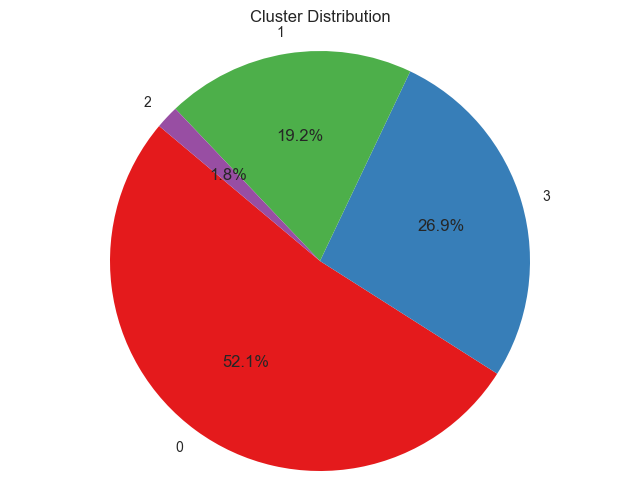

In [29]:
custom_colors = sns.color_palette('Set1', 4)  # Adjust 4 to the number of colors needed


# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Pie Chart(clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

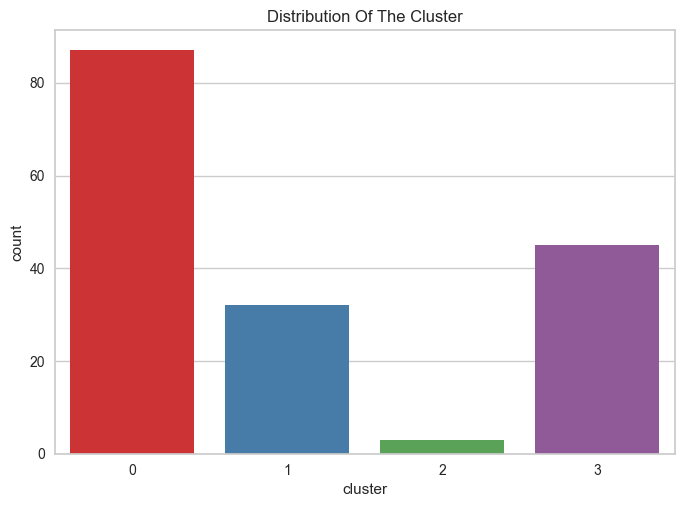

In [30]:
custom_colors = sns.color_palette('Set1', 4)

#Plotting countplot of clusters
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["cluster"], palette= custom_colors)
pl.set_title("Distribution Of The Cluster")
#Save the image below
plt.savefig("Bar chart (clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

## Countries in Each of the Clusters

In [31]:
# Create a pivot table with country as index and cluster values as columns
df_pivot = df.pivot_table(index='country', columns='cluster', aggfunc='size', fill_value=0)

# Reset index to turn the index into a column
df_pivot.reset_index(inplace=True)

# Rename columns to include 'cluster_' prefix
df_pivot.columns = ['country'] + [f'cluster_{col}' for col in df_pivot.columns[1:]]

# Assign DataFrames for each cluster to separate variables
Developing = df_pivot[df_pivot['cluster_0'] > 0][['country', 'cluster_0']].reset_index(drop=True)
Developed = df_pivot[df_pivot['cluster_1'] > 0][['country', 'cluster_1']].reset_index(drop=True)
High_Income = df_pivot[df_pivot['cluster_2'] > 0][['country', 'cluster_2']].reset_index(drop=True) if 'cluster_2' in df_pivot.columns else pd.DataFrame(columns=['country', 'cluster_2'])
Underdeveloped = df_pivot[df_pivot['cluster_3'] > 0][['country', 'cluster_3']].reset_index(drop=True) if 'cluster_3' in df_pivot.columns else pd.DataFrame(columns=['country', 'cluster_3'])

In [32]:
# Display the resulting DataFrames
print("DataFrame for Developing Countries:")
Developing

DataFrame for Developing Countries:


,country,cluster_0
0,Albania,1
1,Algeria,1
2,Antigua and Barbuda,1
3,Argentina,1
4,Armenia,1
...,...,...
82,Uruguay,1
83,Uzbekistan,1
84,Vanuatu,1
85,Venezuela,1


In [33]:
print("DataFrame for Developed Countries:")
Developed


DataFrame for Developed Countries:


,country,cluster_1
0,Australia,1
1,Austria,1
2,Bahamas,1
3,Belgium,1
4,Brunei,1
5,Canada,1
6,Cyprus,1
7,Czech Republic,1
8,Denmark,1
9,Finland,1


In [34]:
print("DataFrame for High Income Countries:")
High_Income


DataFrame for High Income Countries:


,country,cluster_2
0,Luxembourg,1
1,Malta,1
2,Singapore,1


In [35]:
print("DataFrame for Underdeveloped Countries:")
Underdeveloped

DataFrame for Underdeveloped Countries:


,country,cluster_3
0,Afghanistan,1
1,Angola,1
2,Benin,1
3,Burkina Faso,1
4,Burundi,1
5,Cameroon,1
6,Central African Republic,1
7,Chad,1
8,Comoros,1
9,"Congo, Dem. Rep.",1


## Recommendations to HELP International

Based on the thorough analysis conducted and the comprehensive summary report using key macro-economic indicators, I have formulated targeted recommendations for HELP International pertaining to each cluster:


1. **Cluster 3: Underdeveloped Nations**

This cluster represents countries with severe economic challenges, high child mortality rates, low life expectancy, and high inflation. These countries are in urgent need of support to alleviate poverty and improve basic healthcare and living conditions.


2. **Cluster 0: Developing Nations**

These countries have relatively better economic conditions compared to Cluster 3 but still face challenges such as moderate child mortality and inflation rates. Support could focus on improving healthcare systems and reducing economic vulnerability.


3. **Cluster 2: High-Income Nations**

While these countries have high incomes and development levels, there may still be pockets of poverty and inequality. Support could focus on sustainable development goals, healthcare improvements, and social programs.


4. **Cluster 1: Developed Nations**

These countries have high incomes, stable economic conditions, and strong healthcare systems. Support could focus on sustainable development initiatives, education, and social welfare programs.



### Explanation:

The suggested names and rankings prioritize support to clusters with lower incomes, higher child mortality rates, and poorer health indicators (Clusters 3 and 0). These countries are in greater need of immediate assistance to combat poverty and improve living conditions. Cluster 2, despite high incomes, may still require targeted support in certain areas, while Cluster 1, with the highest incomes and stability, may benefit from strategic partnerships and capacity building rather than direct aid.

This approach aligns with focusing HELP International efforts on countries and regions where poverty and developmental challenges are most acute, ensuring resources are allocated effectively to maximize impact.